# Linear Regression
- We will show you how to load some data 
- plot it with a scatterplot 
- calculate the cost function with respect to a straight line.

In [ ]:
# import pkgs
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
#load file
df = pd.read_csv('./data/weight-height.csv')

In [ ]:
df.head()

In [ ]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

In [ ]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
# Arbitrary line (seems to feet pretty good eh?)  This is random

plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [ ]:
def line(x, w=0, b=0):
    return x * w + b

In [ ]:
# notice we can define a space of 100 points equally spaced between 55 and 80.
x = np.linspace(55, 80, 100)

In [ ]:
x

In [ ]:
yhat = line(x, w=0, b=0)

In [ ]:
# now let's calculate yhat and let's look at it.
# should be equal to an array of zeros (because both W and B are zero)
yhat

In [ ]:
# let's plot the function yhat as a function of x and added to our data.
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

In [ ]:
# It's a straight line passing through zero with zero slope.

### Cost Function
- Now we are going to calculate the cost 
- Which is the mean squared error given by the residuals of these data points from this line

In [ ]:
# This will take our true data and our predictive data which is the points of the line the yhat.
# y and the yhat and it will take the difference square it save it in a temporary variable called S 
# and then calculate the mean of s.

def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [ ]:
# Now we passed two arrays X to be the values of height and y true to be the values of weight 
# This makes X and y_true numpy arrays and not pandas objects

X = df[['Height']].values
y_true = df['Weight'].values

In [ ]:
y_true

In [ ]:
X

In [ ]:
y_pred = line(X)

In [ ]:
y_pred

In [ ]:
mses=mean_squared_error(y_true, y_pred.ravel())

In [ ]:
y_pred

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

In [ ]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

## Linear Regression with Tensorflow and Keras

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [23]:
model = Sequential()

In [24]:
model.add(Dense(1, input_shape=(1,)))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [27]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 0s 38us/step - loss: 961.0301
Epoch 2/40
10000/10000 [==============================] - 0s 22us/step - loss: 550.4131
Epoch 3/40
10000/10000 [==============================] - 0s 23us/step - loss: 515.3597
Epoch 4/40
10000/10000 [==============================] - 0s 23us/step - loss: 480.5806
Epoch 5/40
10000/10000 [==============================] - 0s 23us/step - loss: 430.5465
Epoch 6/40
10000/10000 [==============================] - 0s 23us/step - loss: 379.9785
Epoch 7/40
10000/10000 [==============================] - 0s 23us/step - loss: 351.4534
Epoch 8/40
10000/10000 [==============================] - 0s 24us/step - loss: 317.5678
Epoch 9/40
10000/10000 [==============================] - 0s 23us/step - loss: 295.1464
Epoch 10/40
10000/10000 [==============================] - 0s 24us/step - loss: 261.1952
Epoch 11/40
10000/10000 [==============================] - 0s 23us/step - loss: 275.7771
Epoch 12/40
10000/10000 [=====

In [28]:
y_pred = model.predict(X)
y_pred

array([[221.27441],
       [182.19696],
       [223.30414],
       ...,
       [144.28604],
       [184.14374],
       [129.44427]], dtype=float32)

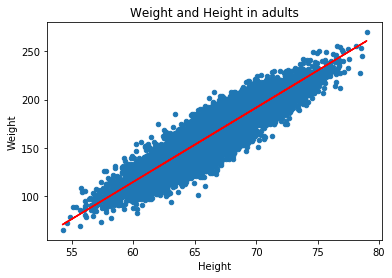

In [29]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [30]:
W, B = model.get_weights()

In [31]:
W

array([[7.7150207]], dtype=float32)

In [32]:
B

array([-348.45685], dtype=float32)

## Evaluating Model Performance
- We also need to establish a score to compare different models.
- Unfortunately we cannot use the cost itself as a score because its value depends on the scale used to measure features and labels.
- Let's start by defining a better score common to use score for aggression:  R-squared score

In [ ]:
# R-squared score compares the sum of the squares of residuals in our model with the sum of the squares
# in a baseline model that predicts the average price 
# IF the mode is really good the sum of the squares will be  small 
# Compared to the sum of the squares and the fraction on the right will tend to be zero.
# R2 close to one = Good score 
# R2 lower than one = Increasingly we're worse score.
# And when you are at zero or below your Model is doing worse than the simple model of using the average price.

from sklearn.metrics import r2_score

In [ ]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

### Train Test Split
- We split our data into training and test set to check how well our model is able to generalize.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [ ]:
len(X_train)

In [ ]:
len(X_test)

In [ ]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [ ]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
# Values that are close together are great because it means that our model is generalizing

on the training and on the test.
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

In [ ]:
# What matters here is not only how high your R-squared (remember closer to one the better) 
# What is most important here is that the score for train and test is close, this mean your model is generalizing

from sklearn.metrics import r2_score
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

# You've just learned the basic ingredients of a neural network.

- Learned about hypothesis.
- You've learned about cost and 
- You've learned about optimization.